# TP6 A short introduction to neural networks with Keras

We will use the Keras library, which serves as a high-level API for TensorFlow.

 Keras is a
deep-learning framework for Python that provides a convenient way to define and
train almost any kind of deep-learning model. Keras was initially developed for
researchers, with the aim of enabling fast experimentation.
Keras has the following key features:
- It allows the same code to run seamlessly on CPU or GPU.
- It has a user-friendly API that makes it easy to quickly prototype deep-learning
models.
- It has built-in support for convolutional networks (for computer vision), recurrent
networks (for sequence processing), and any combination of both.
- It supports arbitrary network architectures: multi-input or multi-output models,
layer sharing, model sharing, and so on.

Extracted from the book "Deep Learning with Python ", author : François Chollet.

Remark :  

    - PyTorch is more popular among researchers and academic practitioners for its flexibility and ease of use.

    - TensorFlow is preferred by industry professionals for large-scale applications and production deployment.


This tutorial uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels). We will only use  an MLP.

Remark : in colab, try using the GPU instead of the CPU (Click on the "Runtime" menu at the top.
Select "Change runtime type."
In the dialog box that appears, choose "GPU" under the Hardware accelerator dropdown menu.
Click "Save."  

(GPU access is available with free Colab, but it comes with usage and performance limitations compared to the paid options).

 Fashion MNIST  is a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow

In [ ]:
import numpy as np
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Let us take a look at the shape and the datatype of the training set :

In [3]:
X_train.shape, X_train.dtype

((60000, 28, 28), dtype('uint8'))

We will need a validation set during training. As the dataset is already shuffled, we will just use the last rows of the dataset for the validation set :

In [4]:
X_val, y_val = X_train[-5000:], y_train[-5000:]
X_train, y_train = X_train[:-5000], y_train[:-5000]

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values. We do not really know the best way to scale the pixel values for modeling, but we know that some scaling will be required.

A good starting point is to normalize the pixel values of grayscale images, e.g. rescale them to the range [0,1]. This involves first converting the data type from unsigned integers to floats, then dividing the pixel values by the maximum value.



(If we used the sigmoid or tanh activation for the first layer, it would be even more important not to have too big input values, as they could cause saturation).



In [5]:
X_train01, X_val01, X_test01 = X_train / 255.0, X_val / 255.0, X_test / 255.0

Remarks :
 Normalizing the inputs  and initializing the weights properly are particularly important in the context of deep learning (see e.g. the vanishing gradient problem or the exploding gradient problem). Here we have a shallow network, but the size of the inputs and of the weights matter anyway, we just have fewer problems.



Here are  the class names (they are not included with the dataset) :  

In [6]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

Q1. What does the first image of the training set represent ?

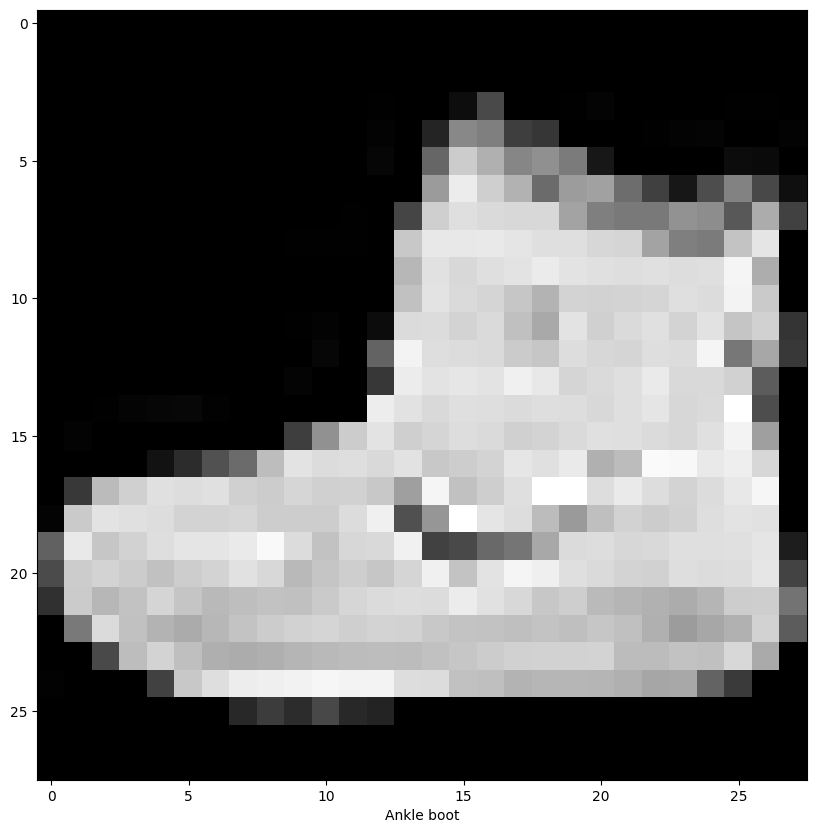

In [7]:
# answer Q1
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(X_train[0], cmap="gray")
plt.xlabel(class_names[y_train[0]])
plt.show()

Let us display the first 25 images in the training set :

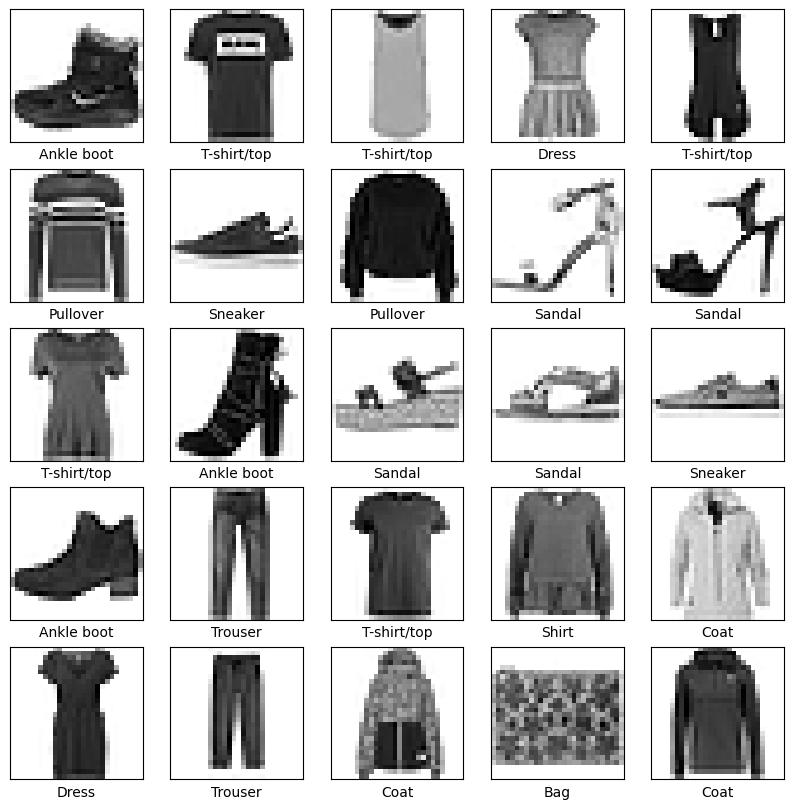

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

Now let us build the neural network. Here we will build a classification MLP (multi layer perceptron).  

In [9]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=[28, 28]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

Q2.
 a) What does the  `Flatten` layer do ?

 b) What do the numbers 300, 100 and 10 represent ?

 c) How many hidden layers are there ?

 d) Why do we use the softmax activation function in the output layer  and what do the outputs of the last layer represent ?

 e) What does "sequential" mean ?

**Answer**:

a) The flatten layer transforms the 2D input (28×28 pixels) into a 1D vector of size 784. This is necessary before feeding the data into fully connected (Dense) layers.

b) They are the number of neurons in each Dense (fully connected) layer:
- 300 neurons in the first hidden layer
- 100 neurons in the second hidden layer
- 10 neurons in the output layer (one for each class, e.g., digits 0–9)

c) There are 2 hidden layers (those with 300 and 100 neurons). The final layer is the output layer.

d) Softmax turns the raw scores into probabilities that sum to 1. Each output represents the model’s confidence that the input belongs to a specific class (e.g., digit 0–9 in MNIST).

e) It means the model’s layers are arranged in a linear sequence: each layer feeds directly into the next, with no branching or multiple inputs/outputs.

f) A Dense layer (also called a fully connected layer) is a layer where every neuron is connected to all the neurons in the previous layer.

The model's summary() method displays all the model's layers :

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Q3. a) What does 235,500 correspond to ?

b) What is a "non trainable" parameter ?

**Answer**: 

a) `235 000` represents the total number of parameters (weights + biais) for the first layer ($(784+1)*300=235 500$).
b) The parameter is not modified by back-propagation

Q4. Display the weights and the biases of the first hidden layer.

In [11]:
# Answer for Q4.
weights, biaises = model.layers[1].get_weights()
weights

array([[-0.02708957, -0.01657043, -0.02541305, ..., -0.0117284 ,
        -0.07759066, -0.04104815],
       [ 0.03956839,  0.03968426,  0.11159597, ...,  0.00709551,
         0.10016222,  0.00951595],
       [ 0.0368086 , -0.00992455,  0.00582458, ..., -0.05939534,
         0.00859205,  0.04936637],
       ...,
       [ 0.0014246 , -0.04466628,  0.00846922, ..., -0.05190999,
         0.03495238,  0.05571212],
       [ 0.00618674,  0.00718611, -0.04097459, ..., -0.04273593,
         0.03054574, -0.05612838],
       [ 0.02281788,  0.00126068, -0.07944933, ...,  0.08006408,
        -0.02017345,  0.07210501]], shape=(784, 300), dtype=float32)

In [12]:
biaises

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Q5.

a)  **Why don't we initialize all the weights to zero (as is done with the biases) ?**

b) **What happens if we initialize all the weights and the biases of a layer with the same value ?**

**Answer**: 

a) If all weights are initialized to zero, every neuron in the layer learns the same thing. Specifically:

During forward propagation, all neurons in the same layer produce the same output.

During backpropagation, they also receive the same gradients.

As a result, they remain identical throughout training — this is called the symmetry problem.

By contrast, biases can safely be initialized to zero because they are scalars per neuron and don’t affect symmetry in the same way — they don’t control how inputs are mixed.

b) Same problem: no diversity in computation.

All neurons in the layer will compute the same output (same weights + same bias).

The network loses its capacity to learn different features, which defeats the purpose of having multiple neurons.

The gradients with respect to each parameter are also the same → weights evolve identically, maintaining this symmetry forever.

Thus, random initialization (usually with small values) breaks this symmetry and allows different neurons to specialize.

----

The initialization is usually random : the weights  are sampled from a normal distribution or a uniform distribution, usually independently. In particular in  the context of deep learning, the variances of these normal distributions are important to keep a relatively constant scale (in the neurons from layer to layer and in the gradients when doing the backpropagation).

Remarks : when you create a multilayer perceptron (MLP) using Keras, each dense layer by default uses the Glorot Uniform initializer for its weight matrix  and initializes the biases to zeros.
You can always override these defaults by specifying a different initializer in the layer's constructor if needed. Actually here, as we used  a ReLU activation, we used the "He" intializer (it does not matter that much to use "He" or "Gloriot" here as the network is shallow. However, even for a shallow network,  it is important for the weights not to be far too small or far too big.)

See also :

https://www.deeplearning.ai/ai-notes/initialization/index.html



Now we need to "compile the model" : it means we will specify the loss function and the optimizer we use. Optionally, you can specify a list of extra metrics to compute during training and evaluation.  

In [13]:
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

We used the  `sparse_categorical_crossentropy` loss because we have "sparse labels" : for each instance, there is just a target class index : from 0 to 9. If instead we had one-hot vectors ( e.g. [0,0,1,0,0,0,0,0,0,0] to represent class 2), then we woud need to use the "categorical_cross_entropy" loss instead.

Since it is a classifier, it is useful to measure its accuracy during training and evaluation, which is why we set `metrics=["accuracy"]`. You can find the list of metrics proposed by keras here : https://www.tensorflow.org/api_docs/python/tf/keras/metrics

Q6. What loss would we have chosen if we had a binary classification problem ? See : https://www.tensorflow.org/api_docs/python/tf/keras/losses

Q7. What basic loss could we use for a regression problem ?


**Answer**:

Q6) BinaryCrossentropy

Q7) MeanSquareError or MeanAbsoluteError

Now the model is ready to be trained. For this we simply need to call its `fit` method :

In [14]:
history = model.fit(X_train01, y_train, epochs=60, validation_data=(X_val01, y_val))

Epoch 1/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7850 - loss: 0.6068 - val_accuracy: 0.8392 - val_loss: 0.4062
Epoch 2/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8627 - loss: 0.3769 - val_accuracy: 0.8496 - val_loss: 0.3903
Epoch 3/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8785 - loss: 0.3303 - val_accuracy: 0.8546 - val_loss: 0.3747
Epoch 4/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8869 - loss: 0.3037 - val_accuracy: 0.8564 - val_loss: 0.3778
Epoch 5/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8955 - loss: 0.2810 - val_accuracy: 0.8696 - val_loss: 0.3513
Epoch 6/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9019 - loss: 0.2642 - val_accuracy: 0.8624 - val_loss: 0.3813
Epoch 7/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9075 - loss: 0.2505 - val_accuracy: 0.8692 - val_loss: 0.3840
Epoch 8/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9107 - loss: 0.2379 - 

Remark : if you call the fit method again, keras continues the training where it left off.


Q8. Can you recall what is an "epoch" ?

**Answer**: An epoch in training a neural network is one complete pass through the entire training dataset.

During an epoch, the model sees every training example once and updates its weights accordingly.

Usually, data is split into mini-batches, so multiple updates happen within a single epoch (this is mini-batch gradient descent).

Training typically involves multiple epochs so the model can gradually improve.

Think of an epoch as one full cycle through the training data to learn patterns and adjust weights.

Q9. The `fit()` method also has the two arguments  `class_weight` and `sample_weight` (not used here).   When can these arguments  be useful ?

- `class_weight` is used to give more importance to underrepresented classes.
- `sample_weight` assigns weights to individual samples, useful for noisy data or time-sensitive importance.

The `fit()` method returns a History object containing in particular a dictionary (`history.history`) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any). Let us display the learning curves.

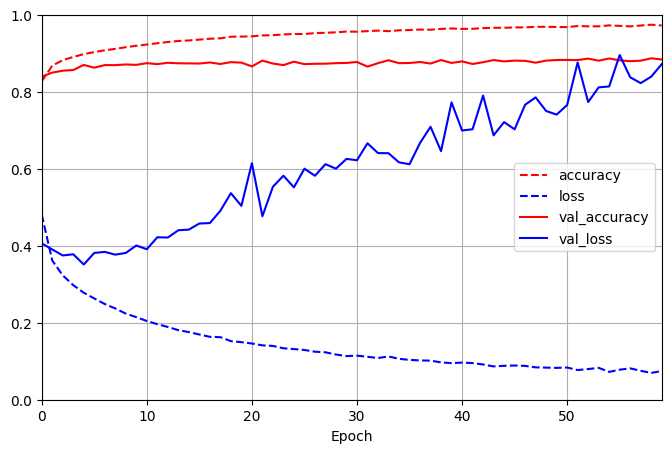

In [15]:
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5),
    xlim=[0, 59],
    ylim=[0, 1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "b--", "r", "b"],
)
plt.show()

Q10. 4 values are displayed : "accuracy", "loss", "val_accuracy" and "val_loss". Can you tell precisely what each value represents ?

**Answer**: 

- `accuracy`: Correct prediction rate on the training set.
- `loss`: Loss function value on the training set.
- `val_accuracy`: Correct prediction rate on the validation set.
- `val_loss`: Loss function value on the validation set.

Q11. Comment the curves.

Remark : if we kept increasing the number of epochs, we would end up with a training loss close to zero and a training accuracy close to 100%. More precisely, after about 150 epochs, we get the following values
- validation loss : about 1.4
- training loss : about 0.03
- validation accuracy : about 89%
- training accuracy : about 99%

**Answer**: There is overfitting (not so grave). This is due to the large number of parameters in the neural network (aobut 260k) while the number of parameters of the dataset is smaller (about 50k)

Q12. a) Find the indices, for the first 200 rows of the validation set, where the model (that we trained for 60 epochs) gets wrong.


In [16]:
probas_val_60 = model.predict(X_val01[:200])
classif_val_60 = probas_val_60.argmax(axis=1)
wrong_classif_val_60 = classif_val_60 != y_val[:200]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


b) Now let us train the model for only 10 epochs and call this model `model_10`.

In [17]:
model_10 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=[28, 28]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

model_10.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

model_10.fit(X_train01, y_train, epochs=10, validation_data=(X_val01, y_val))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7866 - loss: 0.5999 - val_accuracy: 0.8326 - val_loss: 0.4162
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8624 - loss: 0.3776 - val_accuracy: 0.8512 - val_loss: 0.3772
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8763 - loss: 0.3341 - val_accuracy: 0.8502 - val_loss: 0.3915
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8875 - loss: 0.3049 - val_accuracy: 0.8592 - val_loss: 0.3675
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8936 - loss: 0.2835 - val_accuracy: 0.8720 - val_loss: 0.3465
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9017 - loss: 0.2663 - val_accuracy: 0.8752 - val_loss: 0.3437
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9065 - loss: 0.2499 - val_accuracy: 0.8752 - val_loss: 0.3545
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9102 - loss: 0.2404 - 

So the accuracy on the validation set is almost the same with 10 epochs as with 60 epochs (stagnant val accuracy, and close to the training accuracy) but the validation loss is much better (and rather close to the training loss). If we want to understand better the situation, let us look at some values for the predicted probabilities.

c) Find the indices, for the first 200 rows of the validation set, where `model_10` (that we trained for 10 epochs) gets wrong.

In [18]:
probas_val_10 = model_10.predict(X_val01[:200])
classif_val_10 = probas_val_10.argmax(axis=1)
wrong_classif_val_10 = classif_val_10 != y_val[:200]

indices = np.where(wrong_classif_val_10 * wrong_classif_val_60)[0]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


d) Display the estimated probabilities of the two models for the right class and for the indices where both models gets wrong (among the first 200 rows of the validation set). (Round to 3 decimal places)  
   

In [19]:
probas_val_60[indices, y_val[indices]].round(3)

array([0.001, 0.393, 0.343, 0.   , 0.   , 0.001, 0.023, 0.189, 0.   ,
       0.   , 0.   , 0.001, 0.11 , 0.002, 0.   , 0.005, 0.006, 0.021],
      dtype=float32)

 We see that most of the time, in the overfitting situation (60 epochs), for an instance that the model does not classify correctly, the probability for the correct label tends to be  lower :  the model gets wrong for those instances and  is "overly confident while it is wrong" (it indicates a high probability for a wrong label so the probability for the correct label gets lower making the loss increase).






 An idea to prevent this overfitting  is to use **Early stopping** :

In [20]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=5, restore_best_weights=True
)

model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=[28, 28]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

model.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

history2 = model.fit(
    X_train01,
    y_train,
    epochs=60,
    validation_data=(X_val01, y_val),
    callbacks=[early_stopping_cb],
)

Epoch 1/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7864 - loss: 0.5990 - val_accuracy: 0.8298 - val_loss: 0.4282
Epoch 2/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8627 - loss: 0.3785 - val_accuracy: 0.8450 - val_loss: 0.3963
Epoch 3/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8772 - loss: 0.3354 - val_accuracy: 0.8544 - val_loss: 0.3724
Epoch 4/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8889 - loss: 0.3041 - val_accuracy: 0.8632 - val_loss: 0.3656
Epoch 5/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8957 - loss: 0.2829 - val_accuracy: 0.8686 - val_loss: 0.3534
Epoch 6/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9019 - loss: 0.2651 - val_accuracy: 0.8746 - val_loss: 0.3442
Epoch 7/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9071 - loss: 0.2491 - val_accuracy: 0.8844 - val_loss: 0.3403
Epoch 8/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9088 - loss: 0.2387 - 

Q13. a) Explain what the previous cell does (first and last line).

 Hint : https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

b) Can you name another way to prevent overfitting ? (mentioned in the lecture notes).

**Answer**: 

a) *First Line*: This creates a callback to stop training early if the validation loss doesn't improve for 5 consecutive epochs (patience=5). With restore_best_weights=True, the model will roll back to the weights from the epoch with the best validation loss, preventing overfitting.
*Last Line*: This trains the model on X_train01 and y_train for up to 60 epochs. It uses the validation set (X_val01, y_val) to monitor performance. The training may stop early thanks to the early_stopping_cb, and training history is saved in history2.

b) We can use Dropout. It randomly "drops" (i.e. sets to zero) a fraction of the neurons during training, which helps the model generalize better by preventing co-adaptations of neurons. Example:

```{python}
tf.keras.layers.Dropout(rate=0.5)
```
This can be inserted between dense layers to regularize the model.


Remark : if you are not satisfied with the performance of your model, you should  tune the hyperparameters. There are a lot of hyperparameters that you can  tune : learning rate, optimizer, number of hidden layers, number of neurons, batch size etc.
If you want to fine tune the hyperparameters, you can use the Keras Tuner library : https://www.tensorflow.org/tutorials/keras/keras_tuner

Now let us see the performance of our model on the test set.

In [21]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.8669 - loss: 55.3559


[58.230831146240234, 0.864799976348877]

**Optional 1** Train a logistic regression model : this model has far fewer parameters : you should not see the same overfitting problem when increasing the number of epochs.

In [22]:
reg_log = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=[28, 28]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)
reg_log.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)
reg_log.fit(X_train01, y_train, epochs=90, validation_data=(X_val01, y_val))

Epoch 1/90
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - accuracy: 0.7328 - loss: 0.7938 - val_accuracy: 0.8340 - val_loss: 0.4826
Epoch 2/90
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step - accuracy: 0.8391 - loss: 0.4794 - val_accuracy: 0.8422 - val_loss: 0.4516
Epoch 3/90
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 425us/step - accuracy: 0.8498 - loss: 0.4464 - val_accuracy: 0.8442 - val_loss: 0.4396
Epoch 4/90
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 425us/step - accuracy: 0.8539 - loss: 0.4302 - val_accuracy: 0.8468 - val_loss: 0.4333
Epoch 5/90
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 428us/step - accuracy: 0.8566 - loss: 0.4200 - val_accuracy: 0.8476 - val_loss: 0.4295
Epoch 6/90
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 427us/step - accuracy: 0.8587 - loss: 0.4128 - val_accuracy: 0.8486 - val_loss: 0.4271
Epoch 7/90
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 428us/step - accuracy: 0.8605 - loss: 0.4072 - val_accuracy: 0.8470 - val_loss: 0.4256
Epoch 8/90
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step - accuracy: 0.8622 -

**Optional 2** : Train the model on the un-normalized dataset (use only 30 epochs as it takes time).

In [23]:
model_ter = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=[28, 28]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)
model_ter.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)
model_ter.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6586 - loss: 7.7191 - val_accuracy: 0.7086 - val_loss: 0.7708
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7257 - loss: 0.7339 - val_accuracy: 0.7668 - val_loss: 0.5891
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7667 - loss: 0.6082 - val_accuracy: 0.7880 - val_loss: 0.5681
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8169 - loss: 0.5174 - val_accuracy: 0.7946 - val_loss: 0.5648
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8377 - loss: 0.4704 - val_accuracy: 0.8270 - val_loss: 0.5107
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8448 - loss: 0.4490 - val_accuracy: 0.8330 - val_loss: 0.4713
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8521 - loss: 0.4277 - val_accuracy: 0.8534 - val_loss: 0.4069
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8628 - loss: 0.3925 - 

**Optional 3** : Train the model on the dataset with a different normalization : divide by 25000 so that the inputs are much smaller  (use only 30 epochs as it takes time). Compare with the case where you normalize by dividing by 255.0 (you can also try dividing by 2500.0, you should not see such a big difference with the case where we divide by 255.0. Remember that we have a shallow network here).

In [24]:
model_5 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=[28, 28]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)
model_5.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

X_train_far_too_small, X_val_far_too_small = X_train / 25500.0, X_val / 25500.0

model_5.fit(
    X_train_far_too_small,
    y_train,
    epochs=30,
    validation_data=(X_val_far_too_small, y_val),
)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6645 - loss: 0.9781 - val_accuracy: 0.8202 - val_loss: 0.4931
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8294 - loss: 0.4769 - val_accuracy: 0.8336 - val_loss: 0.4414
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8493 - loss: 0.4246 - val_accuracy: 0.8432 - val_loss: 0.4204
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8587 - loss: 0.3927 - val_accuracy: 0.8468 - val_loss: 0.4029
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8652 - loss: 0.3678 - val_accuracy: 0.8494 - val_loss: 0.3902
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8718 - loss: 0.3475 - val_accuracy: 0.8546 - val_loss: 0.3777
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8785 - loss: 0.3303 - val_accuracy: 0.8578 - val_loss: 0.3656
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8828 - loss: 0.3153 - 

**Optional 4** : try using the sigmoid activation for the hidden layers instead of the ReLU. First train the model on normalized data then on un-normalized data.

In [25]:
# sigmoid activation, normalized data (scale : [0,1])
model_sig_norm = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=[28, 28]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(
            300, activation="sigmoid", kernel_initializer="he_normal"
        ),
        tf.keras.layers.Dense(
            100, activation="sigmoid", kernel_initializer="he_normal"
        ),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)
model_sig_norm.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)
model_sig_norm.fit(X_train01, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7407 - loss: 0.7888 - val_accuracy: 0.8360 - val_loss: 0.4605
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8553 - loss: 0.3999 - val_accuracy: 0.8386 - val_loss: 0.4300
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8715 - loss: 0.3539 - val_accuracy: 0.8498 - val_loss: 0.4042
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8813 - loss: 0.3239 - val_accuracy: 0.8580 - val_loss: 0.3892
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8894 - loss: 0.3013 - val_accuracy: 0.8626 - val_loss: 0.3787
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8959 - loss: 0.2828 - val_accuracy: 0.8678 - val_loss: 0.3787
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9021 - loss: 0.2669 - val_accuracy: 0.8678 - val_loss: 0.3790
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9069 - loss: 0.2533 - 

In [26]:
model_sig_un_norm = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=[28, 28]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(
            300, activation="sigmoid", kernel_initializer="he_normal"
        ),
        tf.keras.layers.Dense(
            100, activation="sigmoid", kernel_initializer="he_normal"
        ),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)
model_sig_un_norm.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)
model_sig_un_norm.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6551 - loss: 1.0137 - val_accuracy: 0.6920 - val_loss: 0.7548
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7053 - loss: 0.7489 - val_accuracy: 0.7290 - val_loss: 0.7050
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7162 - loss: 0.7261 - val_accuracy: 0.7220 - val_loss: 0.7043
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7244 - loss: 0.6950 - val_accuracy: 0.7410 - val_loss: 0.6906
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7329 - loss: 0.6854 - val_accuracy: 0.7522 - val_loss: 0.6677
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7434 - loss: 0.6751 - val_accuracy: 0.7538 - val_loss: 0.6704
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7419 - loss: 0.6836 - val_accuracy: 0.7470 - val_loss: 0.6619
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7357 - loss: 0.6719 - 

**Optional 5** Use the ReLU again and try initializing the weights with normally distributed and independent weigths but with a high variance.

In [27]:
model_high_variance = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=[28, 28]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(300, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)
model_high_variance.layers[1].set_weights(
    [200 * np.random.randn(28 * 28, 300) / 100, np.zeros(300)]
)
model_high_variance.layers[2].set_weights(
    [200 * np.random.randn(300, 100) / 100, np.zeros(100)]
)

model_high_variance.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

model_high_variance.fit(X_train01, y_train, epochs=60, validation_data=(X_val01, y_val))

Epoch 1/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6039 - loss: 86.8092 - val_accuracy: 0.7452 - val_loss: 19.3635
Epoch 2/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7728 - loss: 14.7505 - val_accuracy: 0.7648 - val_loss: 8.7317
Epoch 3/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7867 - loss: 6.8569 - val_accuracy: 0.7916 - val_loss: 3.7573
Epoch 4/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7893 - loss: 3.0035 - val_accuracy: 0.7756 - val_loss: 1.6859
Epoch 5/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7805 - loss: 1.3666 - val_accuracy: 0.7798 - val_loss: 1.0656
Epoch 6/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7814 - loss: 0.9145 - val_accuracy: 0.7768 - val_loss: 0.9132
Epoch 7/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7917 - loss: 0.7225 - val_accuracy: 0.7832 - val_loss: 0.8141
Epoch 8/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7993 - loss: 0.6555